# LLM blackjack experiment data analysis

In [94]:
!pip install -q -U pandas
import pandas as pd

In [46]:
# Load the CSV file into a pandas DataFrame
dfBlackJackLLM = pd.read_csv("Data\BlackJackLlm.csv")
print("Shape:")
print(dfBlackJackLLM.shape)
print("Columns:")
print(dfBlackJackLLM.columns)

Shape:
(1700, 8)
Columns:
Index(['promptKey', 'temperature', 'timesteps', 'rewards', 'hitActions',
       'stickActions', 'randomActions', 'DateTime'],
      dtype='object')


In [47]:
dfBlackJackLLM.head()

,promptKey,temperature,timesteps,rewards,hitActions,stickActions,randomActions,DateTime
0,zero_shot_prompt,0.1,1,-1.0,0,1,0,2024-04-17 09:55:51.449298
1,zero_shot_prompt,0.1,1,1.0,0,1,0,2024-04-17 09:55:53.963973
2,zero_shot_prompt,0.1,1,0.0,0,1,0,2024-04-17 09:55:56.742315
3,zero_shot_prompt,0.1,3,-1.0,3,0,0,2024-04-17 09:56:09.323730
4,zero_shot_prompt,0.1,1,-1.0,0,1,0,2024-04-17 09:56:13.035040


In [48]:
print(dfBlackJackLLM.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   promptKey      1700 non-null   object 
 1   temperature    1700 non-null   float64
 2   timesteps      1700 non-null   int64  
 3   rewards        1700 non-null   float64
 4   hitActions     1700 non-null   int64  
 5   stickActions   1700 non-null   int64  
 6   randomActions  1700 non-null   int64  
 7   DateTime       1700 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 106.4+ KB
None


In [49]:
dfBlackJackLLM.describe()

,temperature,timesteps,rewards,hitActions,stickActions,randomActions
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.517647,1.676471,-0.634118,1.275882,0.322941,0.077647
std,0.350288,0.820592,0.754980,0.997233,0.467738,0.323451
min,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.100000,1.000000,-1.000000,1.000000,0.000000,0.000000
50%,0.400000,1.000000,-1.000000,1.000000,0.000000,0.000000
75%,0.700000,2.000000,-1.000000,2.000000,1.000000,0.000000
max,1.000000,6.000000,1.000000,6.000000,1.000000,3.000000


In [50]:
dfBlackJackLLM.groupby(["promptKey","temperature"]).describe(percentiles=[])

timesteps                                 \
                                        count  mean       std  min  50%  max   
promptKey               temperature                                            
Chain_of_Thought_prompt 0.1             100.0  1.75  0.796140  1.0  2.0  4.0   
                        0.4             100.0  1.76  0.842315  1.0  2.0  5.0   
                        0.7             100.0  1.97  0.881402  1.0  2.0  5.0   
                        1.0             100.0  1.70  0.784960  1.0  2.0  4.0   
few_shot_prompt         0.1             100.0  1.82  0.833394  1.0  2.0  4.0   
                        0.4             100.0  1.65  0.743660  1.0  2.0  4.0   
                        0.7             100.0  1.64  0.759053  1.0  1.0  4.0   
                        1.0             100.0  1.58  0.754515  1.0  1.0  4.0   
one_shot_prompt         0.1             100.0  1.83  0.899551  1.0  2.0  6.0   
                        0.4             100.0  1.85  0.925235  1.0  2.0  5.0   
                        0.7             100.0  1.74  0.970473  1.0  1.0  6.0   
                        1.0             100.0  1.58  0.780831  1.0  1.0  4.0   
randomBaseLine          0.0             100.0  1.25  0.500000  1.0  1.0  3.0   
zero_shot_prompt        0.1             100.0  1.58  0.793662  1.0  1.0  4.0   
                        0.4             100.0  1.55  0.808728  1.0  1.0  6.0   
                        0.7             100.0  1.67  0.829445  1.0  1.0  5.0   
                        1.0             100.0  1.58  0.754515  1.0  1.0  4.0   

                                    rewards                       ...  \
                                      count  mean       std  min  ...   
promptKey               temperature                               ...   
Chain_of_Thought_prompt 0.1           100.0 -0.77  0.600589 -1.0  ...   
                        0.4           100.0 -0.82  0.557411 -1.0  ...   
                        0.7           100.0 -0.74  0.660884 -1.0  ...   
                        1.0           100.0 -0.77  0.633333 -1.0  ...   
few_shot_prompt         0.1           100.0 -0.70  0.703526 -1.0  ...   
                        0.4           100.0 -0.56  0.808040 -1.0  ...   
                        0.7           100.0 -0.64  0.745627 -1.0  ...   
                        1.0           100.0 -0.60  0.791368 -1.0  ...   
one_shot_prompt         0.1           100.0 -0.57  0.819645 -1.0  ...   
                        0.4           100.0 -0.59  0.792579 -1.0  ...   
                        0.7           100.0 -0.57  0.807227 -1.0  ...   
                        1.0           100.0 -0.53  0.846323 -1.0  ...   
randomBaseLine          0.0           100.0 -0.43  0.879107 -1.0  ...   
zero_shot_prompt        0.1           100.0 -0.74  0.645419 -1.0  ...   
                        0.4           100.0 -0.53  0.846323 -1.0  ...   
                        0.7           100.0 -0.59  0.779731 -1.0  ...   
                        1.0           100.0 -0.63  0.760847 -1.0  ...   

                                    stickActions                randomActions  \
                                             std  min  50%  max         count   
promptKey               temperature                                             
Chain_of_Thought_prompt 0.1             0.409360  0.0  0.0  1.0         100.0   
                        0.4             0.386123  0.0  0.0  1.0         100.0   
                        0.7             0.394277  0.0  0.0  1.0         100.0   
                        1.0             0.386123  0.0  0.0  1.0         100.0   
few_shot_prompt         0.1             0.446196  0.0  0.0  1.0         100.0   
                        0.4             0.487832  0.0  0.0  1.0         100.0   
                        0.7             0.494311  0.0  0.0  1.0         100.0   
                        1.0             0.490207  0.0  0.0  1.0         100.0   
one_shot_prompt         0.1             0.472582  0.0  0.0  1.0         100.0   
  

In [74]:
dfBlackJackLLM.pivot_table(
    ["timesteps", "hitActions", "stickActions", "randomActions", "rewards"],
    ["promptKey","temperature"],
    aggfunc="sum",
)

hitActions  randomActions  rewards  \
promptKey               temperature                                       
Chain_of_Thought_prompt 0.1                 154              0    -77.0   
                        0.4                 158              0    -82.0   
                        0.7                 178              0    -74.0   
                        1.0                 152              0    -77.0   
few_shot_prompt         0.1                 155              0    -70.0   
                        0.4                 127              0    -56.0   
                        0.7                 121              2    -64.0   
                        1.0                 119              0    -60.0   
one_shot_prompt         0.1                 150              0    -57.0   
                        0.4                 155              0    -59.0   
                        0.7                 129              0    -57.0   
                        1.0                 114              0    -53.0   
randomBaseLine          0.0                   0            125    -43.0   
zero_shot_prompt        0.1                 123              0    -74.0   
                        0.4                 103              4    -53.0   
                        0.7                 121              1    -59.0   
                        1.0                 110              0    -63.0   

                                     stickActions  timesteps  
promptKey               temperature                           
Chain_of_Thought_prompt 0.1                    21        175  
                        0.4                    18        176  
                        0.7                    19        197  
                        1.0                    18        170  
few_shot_prompt         0.1                    27        182  
                        0.4                    38        165  
                        0.7                    41        164  
                        1.0                    39        158  
one_shot_prompt         0.1                    33        183  
                        0.4                    30        185  
                        0.7                    45        174  
                        1.0                    44        158  
randomBaseLine          0.0                     0        125  
zero_shot_prompt        0.1                    35        158  
                        0.4                    48        155  
                        0.7                    45        167  
                        1.0                    48        158

In [80]:
import numpy as np 
freq_table = pd.crosstab(dfBlackJackLLM['promptKey'], dfBlackJackLLM['rewards'], normalize='index') 
freq_table

rewards,-1.0,0.0,1.0
promptKey,,,
Chain_of_Thought_prompt,0.8750,0.0250,0.1000
few_shot_prompt,0.7975,0.0300,0.1725
one_shot_prompt,0.7725,0.0200,0.2075
randomBaseLine,0.6900,0.0500,0.2600
zero_shot_prompt,0.7950,0.0325,0.1725


In [52]:
!pip install -q -U seaborn
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

C:\Users\johan\AppData\Local\Temp\ipykernel_30624\2641249601.py:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='promptKey', y='rewards', hue='temperature', data=grouped_df, palette=sns.color_palette("flare"))


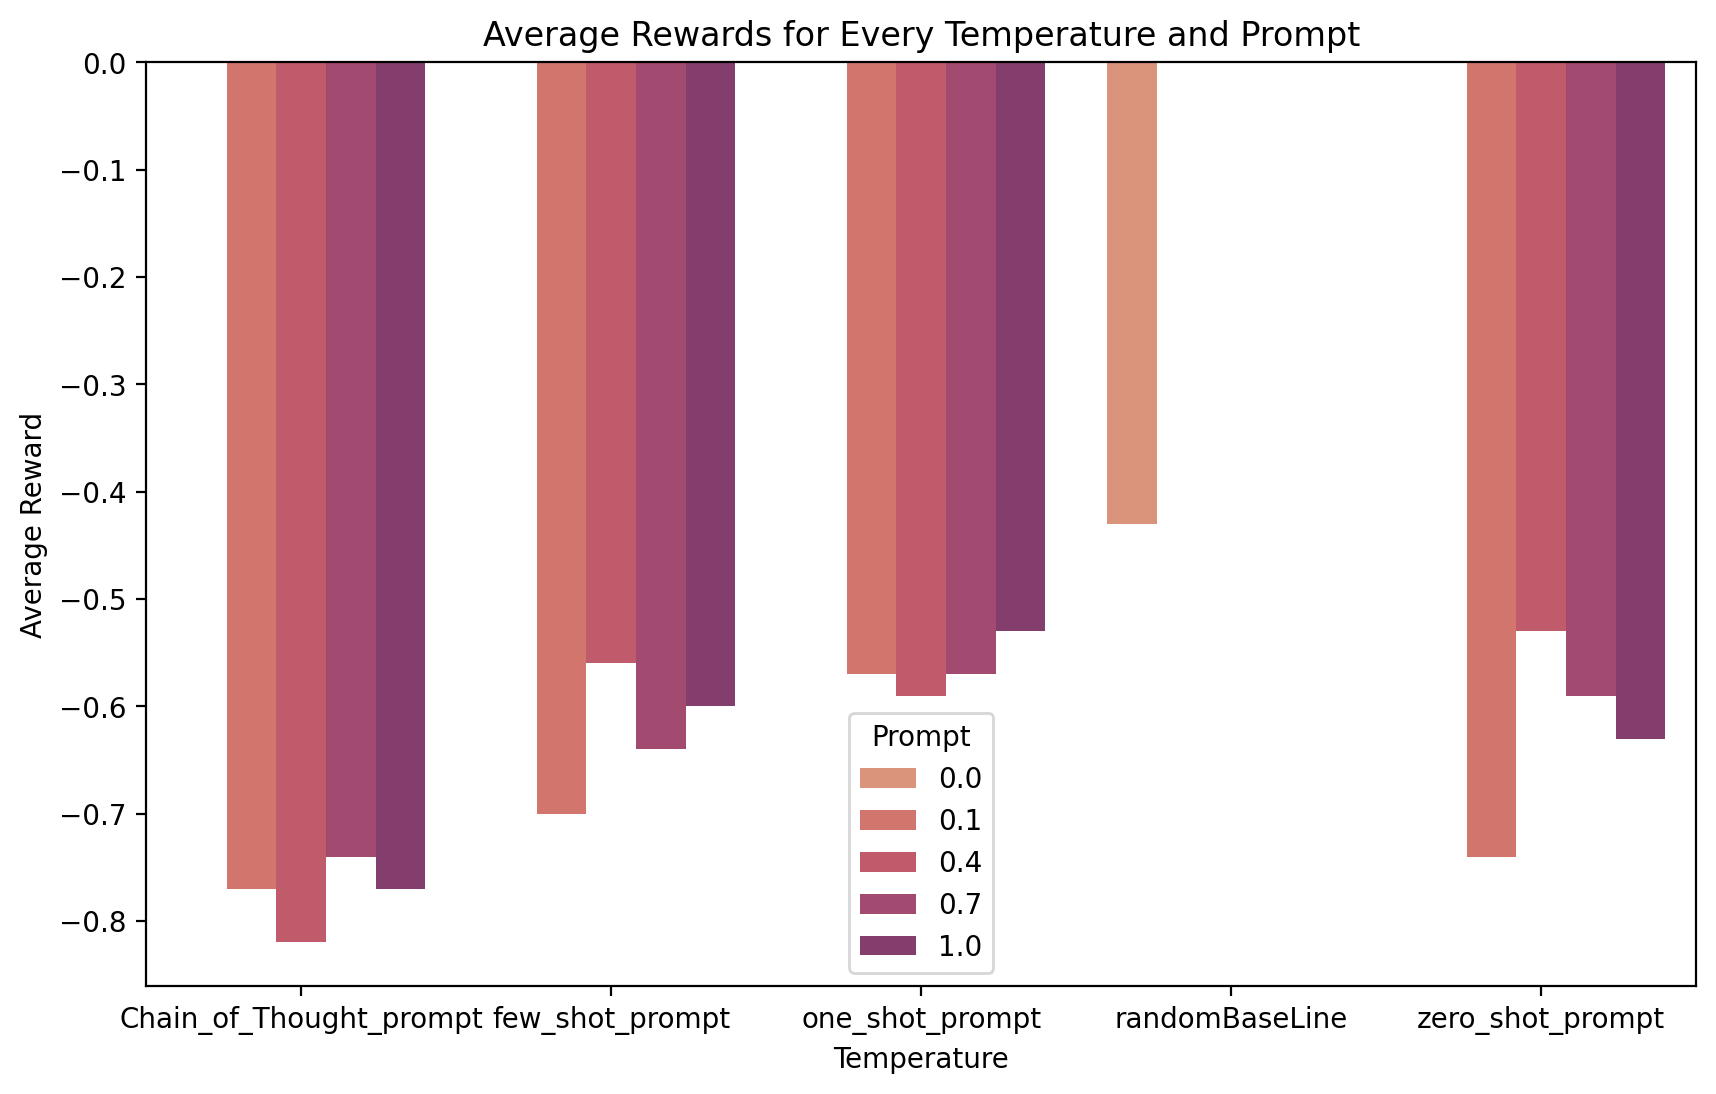

In [95]:
# Group by temperature and prompt, then sum the rewards
grouped_df = dfBlackJackLLM.groupby(['promptKey', 'temperature']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='promptKey', y='rewards', hue='temperature', data=grouped_df, palette=sns.color_palette("flare"))
plt.title('Average Rewards for Every Temperature and Prompt')
plt.xlabel('Temperature')
plt.ylabel('Average Reward')

plt.legend(title='Prompt')
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_30624\3640302819.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(x='temperature', y='rewards', hue='temperature', data=grouped_df, palette=sns.color_palette("flare"), order=grouped_df['temperature'])


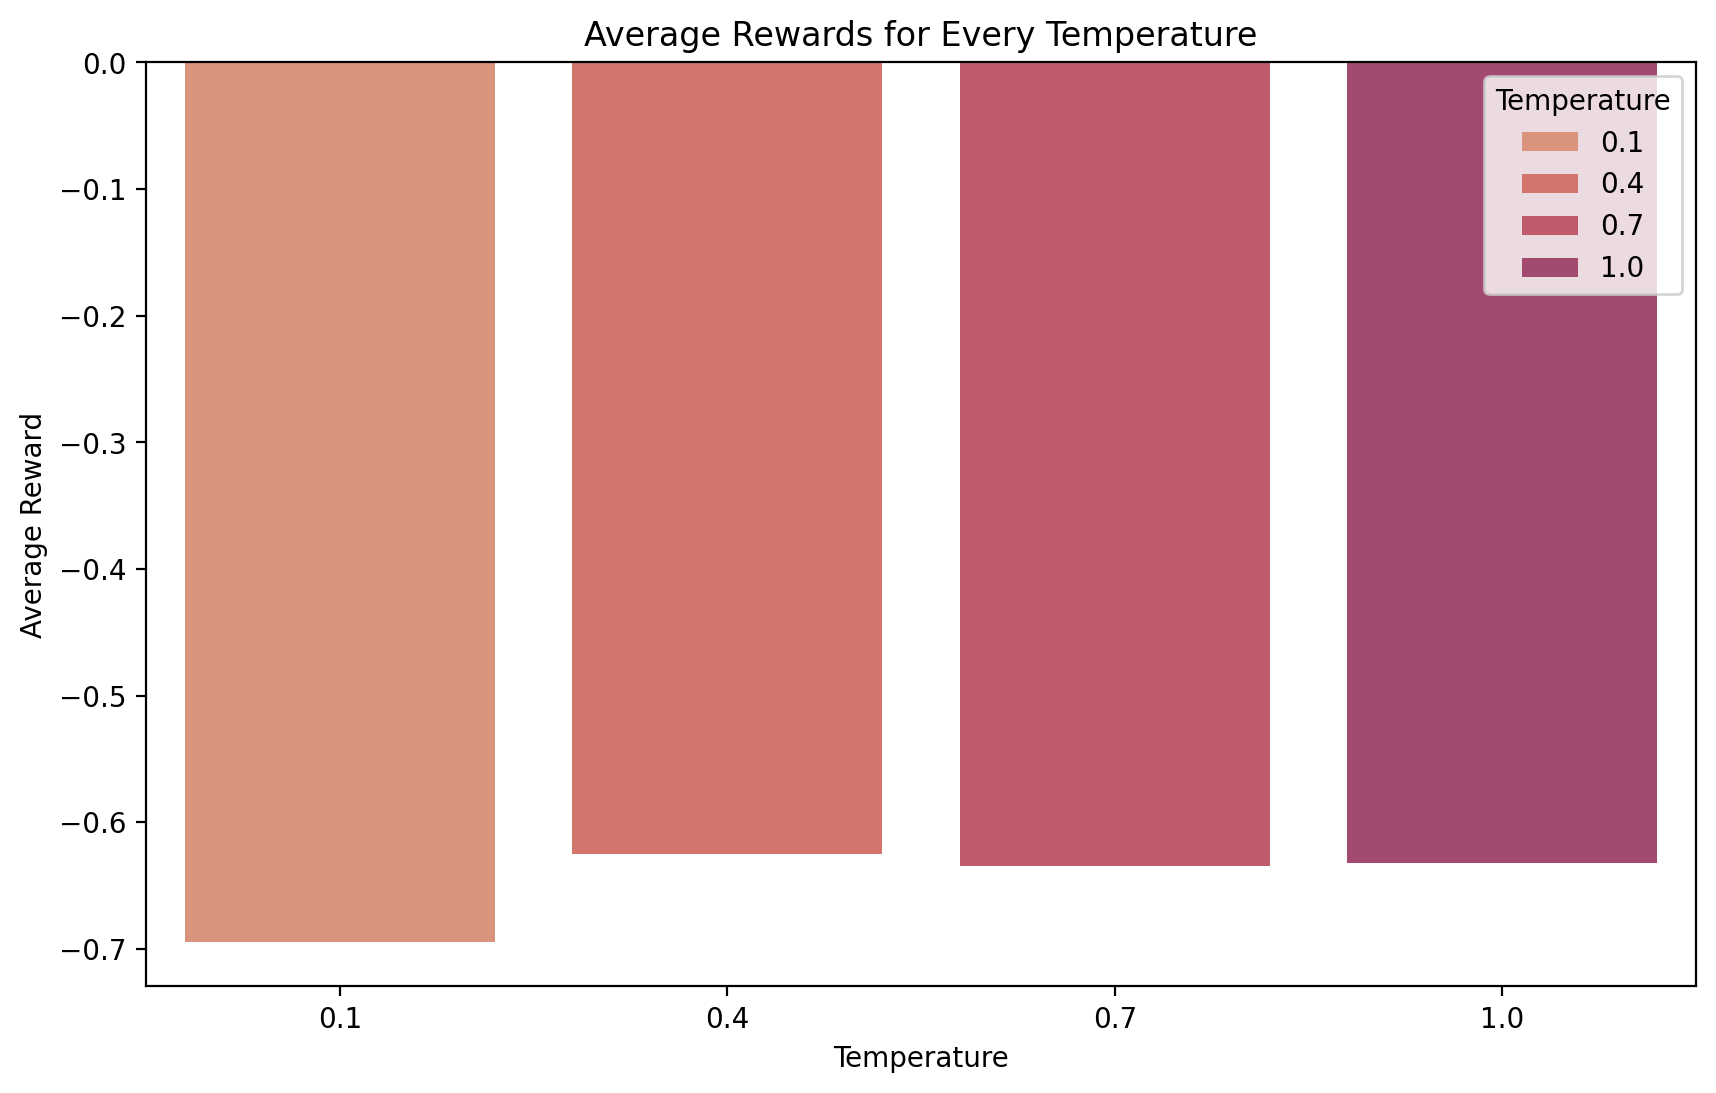

In [92]:
# Group by temperature and prompt, then sum the rewards
grouped_df = dfBlackJackLLM[dfBlackJackLLM['promptKey'] != "randomBaseLine"] .groupby(['temperature']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature', y='rewards', hue='temperature', data=grouped_df, palette=sns.color_palette("flare"), order=grouped_df['temperature'])
plt.title('Average Rewards for Every Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Reward')

plt.legend(title='Temperature')
plt.show()

C:\Users\johan\AppData\Local\Temp\ipykernel_30624\488412029.py:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='promptKey', y='rewards', hue='promptKey', data=grouped_df, palette=sns.color_palette("flare"), order=grouped_df['promptKey'])


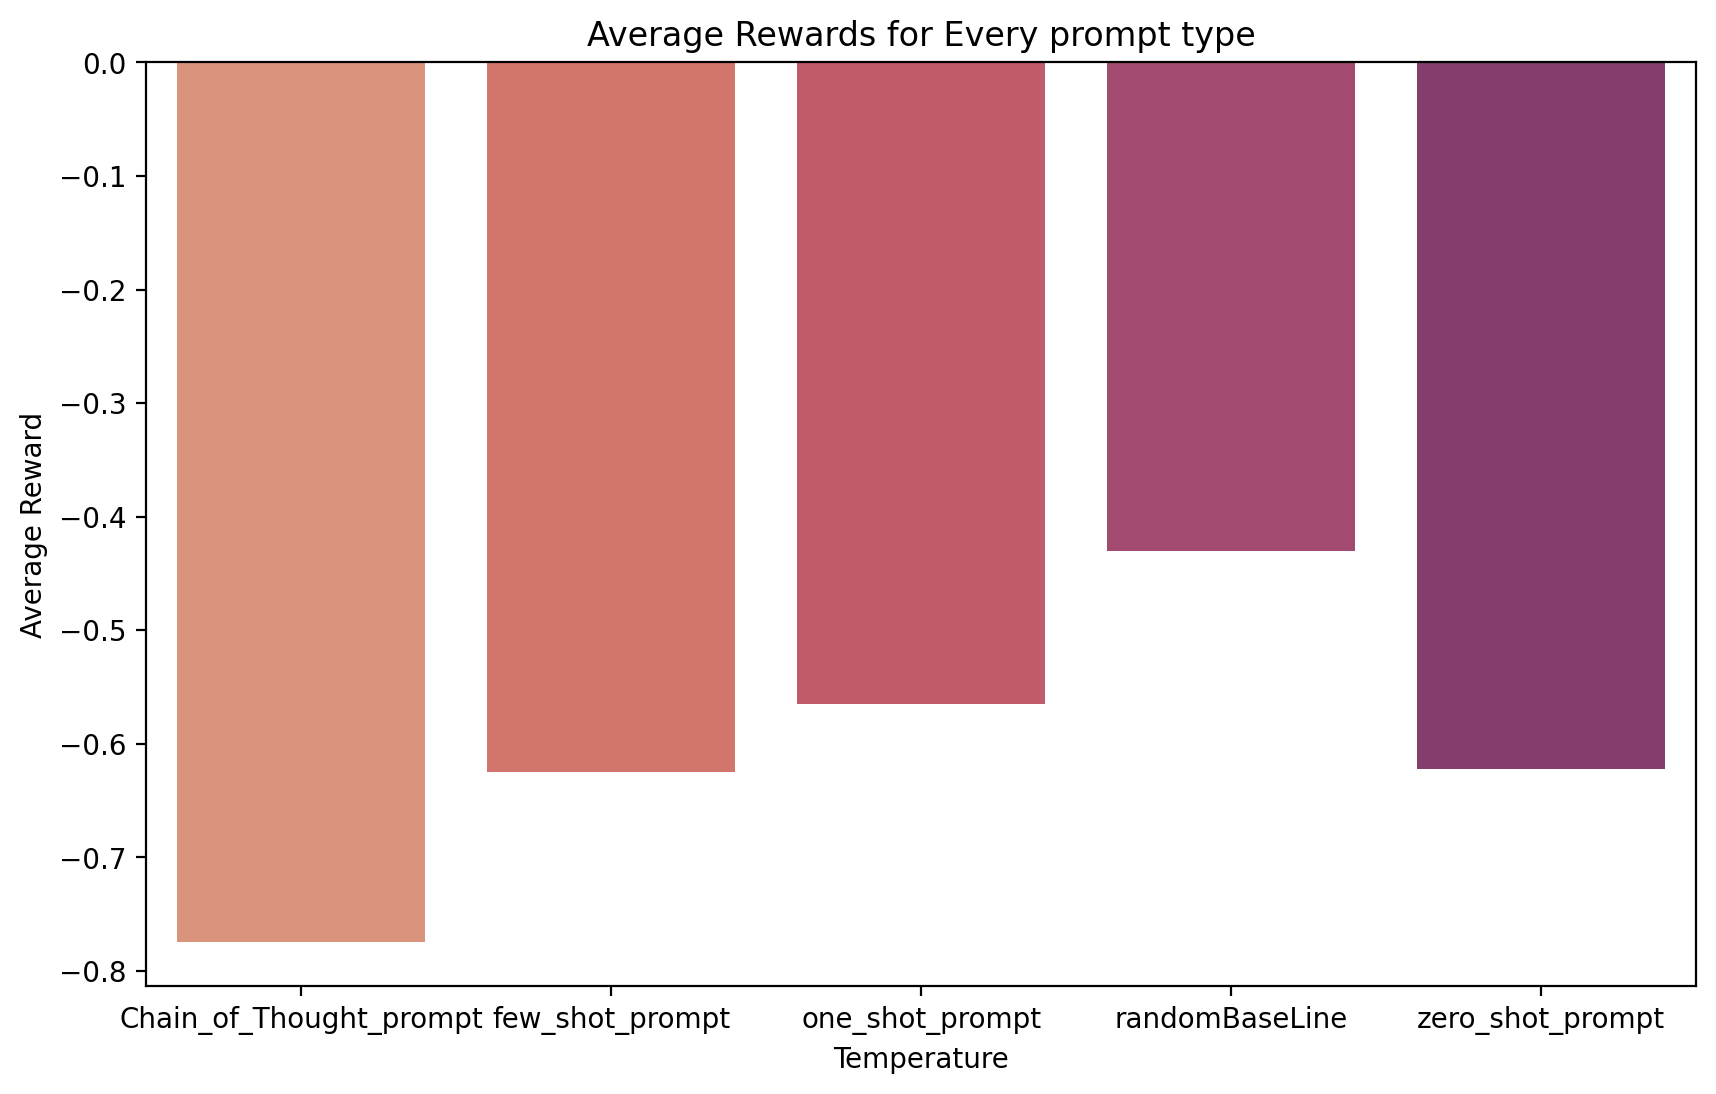

In [93]:
# Group by temperature and prompt, then sum the rewards
grouped_df = dfBlackJackLLM.groupby(['promptKey']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='promptKey', y='rewards', hue='promptKey', data=grouped_df, palette=sns.color_palette("flare"), order=grouped_df['promptKey'])
plt.title('Average Rewards for Every prompt type')
plt.xlabel('Temperature')
plt.ylabel('Average Reward')


plt.show()